In [1]:
# -*- coding: utf-8 -*-
import sys
sys.path.insert(0,'/Library/Frameworks/GDAL.framework/Versions/1.11/Python/2.7/site-packages')
sys.path.insert(0,'/usr/local/Cellar/opencv/2.4.13.2/lib/python2.7/site-packages')
from osgeo import gdal, osr, ogr
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig 
import numpy as np
np.random.seed(12345)
import scipy as sp
import os, math, random, re
%matplotlib inline
import matplotlib

In [2]:
RASTER_FILE_PATH = '/Users/mac/Downloads/nanpi/2017'
RASTER_REGEX = re.compile(r'^nanpi_ndvi_250m_2017_(?P<month>\d{2})_(?P<day>\d{2}).tif$')
def ReadBandArray(raster_filename, band_number=1):
    try:
        raster = gdal.Open(raster_filename)
        band = raster.GetRasterBand(band_number)
        return band.ReadAsArray()
    except Exception as e:
        print e
        print raster_filename, os.path.exist(raster_filename)

raster_filenames = []
for dirpath, dirnames, filenames in os.walk(RASTER_FILE_PATH):
    for filename in filenames:
        if re.match(RASTER_REGEX, filename):
            raster_filenames.append(os.path.join(dirpath, filename))

In [3]:
fit_data = None
for filename in raster_filenames:
    a = ReadBandArray(filename).reshape(-1,1)
    if fit_data is None:
        fit_data = a
    else:
        fit_data = np.hstack((fit_data, a))
# fit_data[np.isnan(fit_data)] = 1
fit_data.shape

(360000, 150)

In [4]:
mask = np.all(np.isnan(fit_data) | np.equal(fit_data, 0), axis=1)
notNanData = fit_data[~mask]
shape = notNanData.shape

In [5]:
shape

(195348, 150)

In [6]:
idx = np.random.randint(shape[0], size=10000)
curves = notNanData[idx,:].tolist()

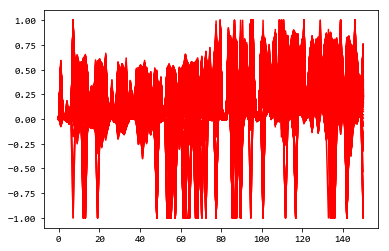

In [7]:
time_sequence = np.linspace(0, 150, 150)
for i,curve in enumerate(curves):
    print i
    plt.plot(time_sequence, curve, "r", label=u"a")
plt.show()